### LAPTOP SPECS AND LATEST PRICE (EDA) ANALYSIS

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

### IMPORTING DATA

In [2]:
train = pd.read_csv("C:/Users/velan D/Desktop/Internship 2/Laptop Exploratory Data Analysis/Cleaned_Laptop_data.csv")
train

brand     model processor_brand     processor_name processor_gnrtn  \
0     Lenovo   A6-9225             AMD  A6-9225 Processor            10th   
1     Lenovo   Ideapad             AMD           APU Dual            10th   
2      Avita      PURA             AMD           APU Dual            10th   
3      Avita      PURA             AMD           APU Dual            10th   
4      Avita      PURA             AMD           APU Dual            10th   
..       ...       ...             ...                ...             ...   
891     ASUS       ROG             AMD            Ryzen 9         Missing   
892     ASUS     Ryzen             AMD            Ryzen 9         Missing   
893     ASUS     Ryzen             AMD            Ryzen 9         Missing   
894  SAMSUNG    Galaxy        Qualcomm      Snapdragon 7c         Missing   
895   Lenovo  Thinkpad             AMD            Ryzen 5            10th   

      ram_gb ram_type      ssd      hdd       os  ... display_size  warranty  \
0    4 GB GB     DDR4     0 GB  1024 GB  Windows  ...      Missing         0   
1    4 GB GB     DDR4     0 GB   512 GB  Windows  ...      Missing         0   
2    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
3    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
4    4 GB GB     DDR4   256 GB     0 GB  Windows  ...      Missing         0   
..       ...      ...      ...      ...      ...  ...          ...       ...   
891  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
892  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...      Missing         1   
893  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
894  4 GB GB  LPDDR4X     0 GB   512 GB  Windows  ...      Missing         0   
895  8 GB GB     DDR4   512 GB     0 GB      DOS  ...           14         0   

    Touchscreen msoffice  latest_price old_price discount  star_rating  \
0            No       No         24990     32790       23          3.7   
1            No       No         19590     21325        8          3.6   
2            No       No         19990     27990       28          3.7   
3            No       No         21490     27990       23          3.7   
4            No       No         24990     33490       25          3.7   
..          ...      ...           ...       ...      ...          ...   
891          No       No        144990    194990       25          0.0   
892          No       No        149990         0        0          0.0   
893          No       No        142990         0        0          0.0   
894          No       No         38990     47990       18          0.0   
895          No       No         57490     78400       26          4.2   

     ratings  reviews  
0         63       12  
1       1894      256  
2       1153      159  
3       1153      159  
4       1657      234  
..       ...      ...  
891        0        0  
892        0        0  
893        0        0  
894        0        0  
895       18        4  

[896 rows x 23 columns]

The data are presented by 896 objects according to 23 features

It is necessary to find out the number of categorical and numerical features

In [3]:
train.head()

brand    model processor_brand     processor_name processor_gnrtn  \
0  Lenovo  A6-9225             AMD  A6-9225 Processor            10th   
1  Lenovo  Ideapad             AMD           APU Dual            10th   
2   Avita     PURA             AMD           APU Dual            10th   
3   Avita     PURA             AMD           APU Dual            10th   
4   Avita     PURA             AMD           APU Dual            10th   

    ram_gb ram_type     ssd      hdd       os  ... display_size  warranty  \
0  4 GB GB     DDR4    0 GB  1024 GB  Windows  ...      Missing         0   
1  4 GB GB     DDR4    0 GB   512 GB  Windows  ...      Missing         0   
2  4 GB GB     DDR4  128 GB     0 GB  Windows  ...      Missing         0   
3  4 GB GB     DDR4  128 GB     0 GB  Windows  ...      Missing         0   
4  4 GB GB     DDR4  256 GB     0 GB  Windows  ...      Missing         0   

  Touchscreen msoffice  latest_price old_price discount  star_rating  ratings  \
0          No       No         24990     32790       23          3.7       63   
1          No       No         19590     21325        8          3.6     1894   
2          No       No         19990     27990       28          3.7     1153   
3          No       No         21490     27990       23          3.7     1153   
4          No       No         24990     33490       25          3.7     1657   

   reviews  
0       12  
1      256  
2      159  
3      159  
4      234  

[5 rows x 23 columns]

In [4]:
train.shape

(896, 23)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

Let's look at the statistics of the dataset, as well as the presence of possible outliers.

In [6]:
train.describe()

graphic_card_gb    warranty   latest_price      old_price    discount  \
count       896.000000  896.000000     896.000000     896.000000  896.000000   
mean          1.198661    0.691964   76309.860491   88134.154018   18.527902   
std           2.057454    0.606282   46613.354368   55719.645554   10.508486   
min           0.000000    0.000000   13990.000000       0.000000    0.000000   
25%           0.000000    0.000000   45490.000000   54940.500000   11.000000   
50%           0.000000    1.000000   63494.000000   78052.500000   19.000000   
75%           2.000000    1.000000   89090.000000  111019.500000   26.000000   
max           8.000000    3.000000  441990.000000  377798.000000   57.000000   

       star_rating       ratings      reviews  
count   896.000000    896.000000   896.000000  
mean      2.980469    367.391741    46.152902  
std       1.965254   1106.309355   136.079586  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     0.000000  
50%       4.100000     19.000000     3.000000  
75%       4.400000    179.500000    23.250000  
max       5.000000  15279.000000  1947.000000

Hypothesis: There are outliers both for the minimum price values and for the maximum ones. There are also outliers in ratings and reviews, which can inform us about the most popular models, or fake reviews to boost sales.

### EXPLORATORY DATA ANALYSIS

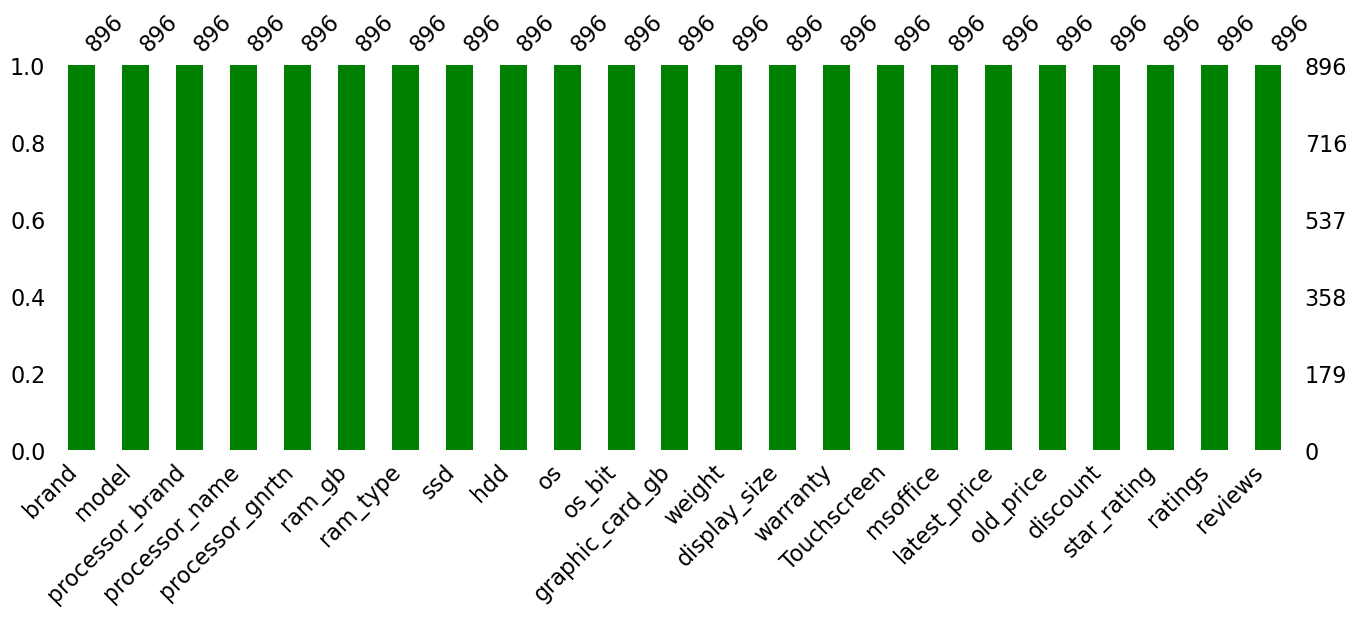

In [7]:
#let's check the information for gaps.
msno.bar(train, figsize = (16,5),color = "green")
plt.show()

There are no gaps in the data. But they can be disguised as column values.

In [8]:
#Check the dataset for duplicates.
train.duplicated().sum()

20

In [9]:
#Let's remove the duplicates.
train = train.drop_duplicates(keep = "last")
train.count()

brand              876
model              876
processor_brand    876
processor_name     876
processor_gnrtn    876
ram_gb             876
ram_type           876
ssd                876
hdd                876
os                 876
os_bit             876
graphic_card_gb    876
weight             876
display_size       876
warranty           876
Touchscreen        876
msoffice           876
latest_price       876
old_price          876
discount           876
star_rating        876
ratings            876
reviews            876
dtype: int64

In [10]:
#Let's separate the continuous variables form the categorical once and do the analysis.
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'brand' has '21' unique values
Feature 'model' has '117' unique values
Feature 'processor_brand' has '5' unique values
Feature 'processor_name' has '28' unique values
Feature 'processor_gnrtn' has '8' unique values
Feature 'ram_gb' has '4' unique values
Feature 'ram_type' has '6' unique values
Feature 'ssd' has '8' unique values
Feature 'hdd' has '4' unique values
Feature 'os' has '3' unique values
Feature 'os_bit' has '2' unique values
Feature 'graphic_card_gb' has '5' unique values
Feature 'weight' has '3' unique values
Feature 'display_size' has '16' unique values
Feature 'warranty' has '4' unique values
Feature 'Touchscreen' has '2' unique values
Feature 'msoffice' has '2' unique values
Feature 'latest_price' has '429' unique values
Feature 'old_price' has '564' unique values
Feature 'discount' has '48' unique values
Feature 'star_rating' has '30' unique values
Feature 'ratings' has '310' unique values
Feature 'reviews' has '152' unique values


Continuous variables are 'latest_price', 'old_price', 'rating', 'reviews'.

Categorical all others excep 'models'.

### ANALYSIS

Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

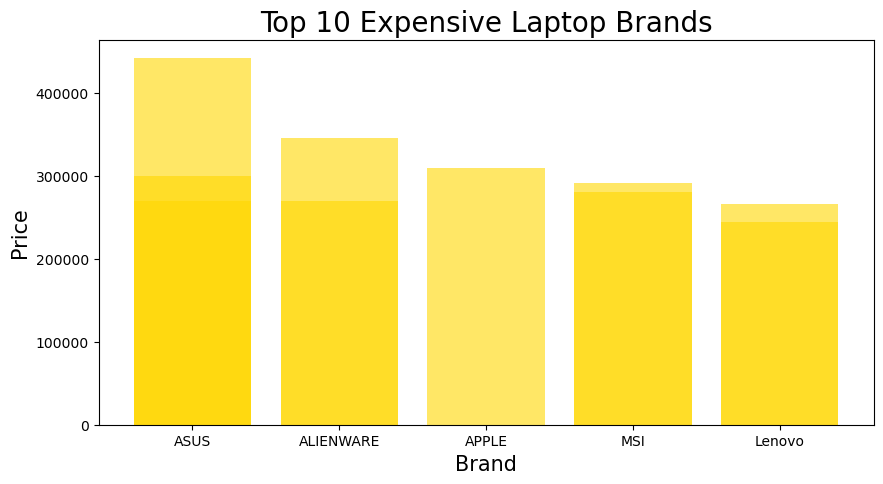

In [11]:
#Let's analyze the 10 cheapest and 10 most expensive laptops, depending on the brand.
top10 = train.nlargest(10,'latest_price')
plt.figure(figsize=(10,5))
plt.bar(top10['brand'], top10['latest_price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 15)
plt.xlabel("Brand", fontsize = 15)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

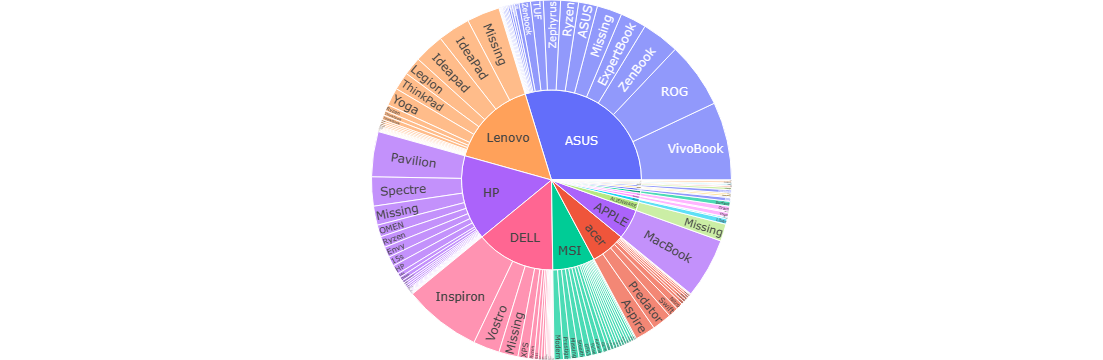

In [12]:
#Let's look at the most expnsive laptops using a pie chart.
import plotly.express as px
fig = px.sunburst(train, path=['brand', 'model'], values='latest_price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

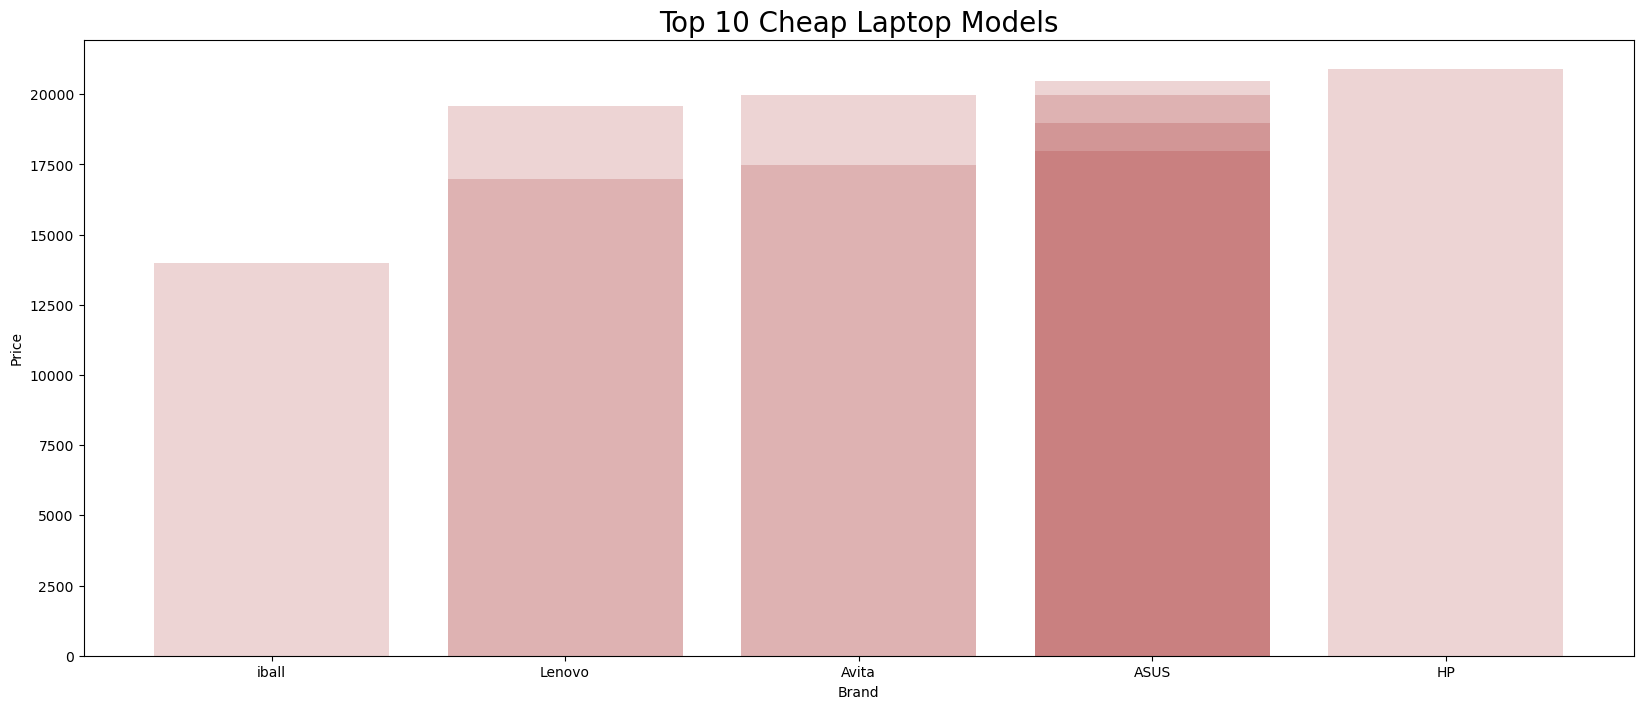

In [13]:
#Top 10 cheap Laptop Models
top10 = train.nsmallest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)#

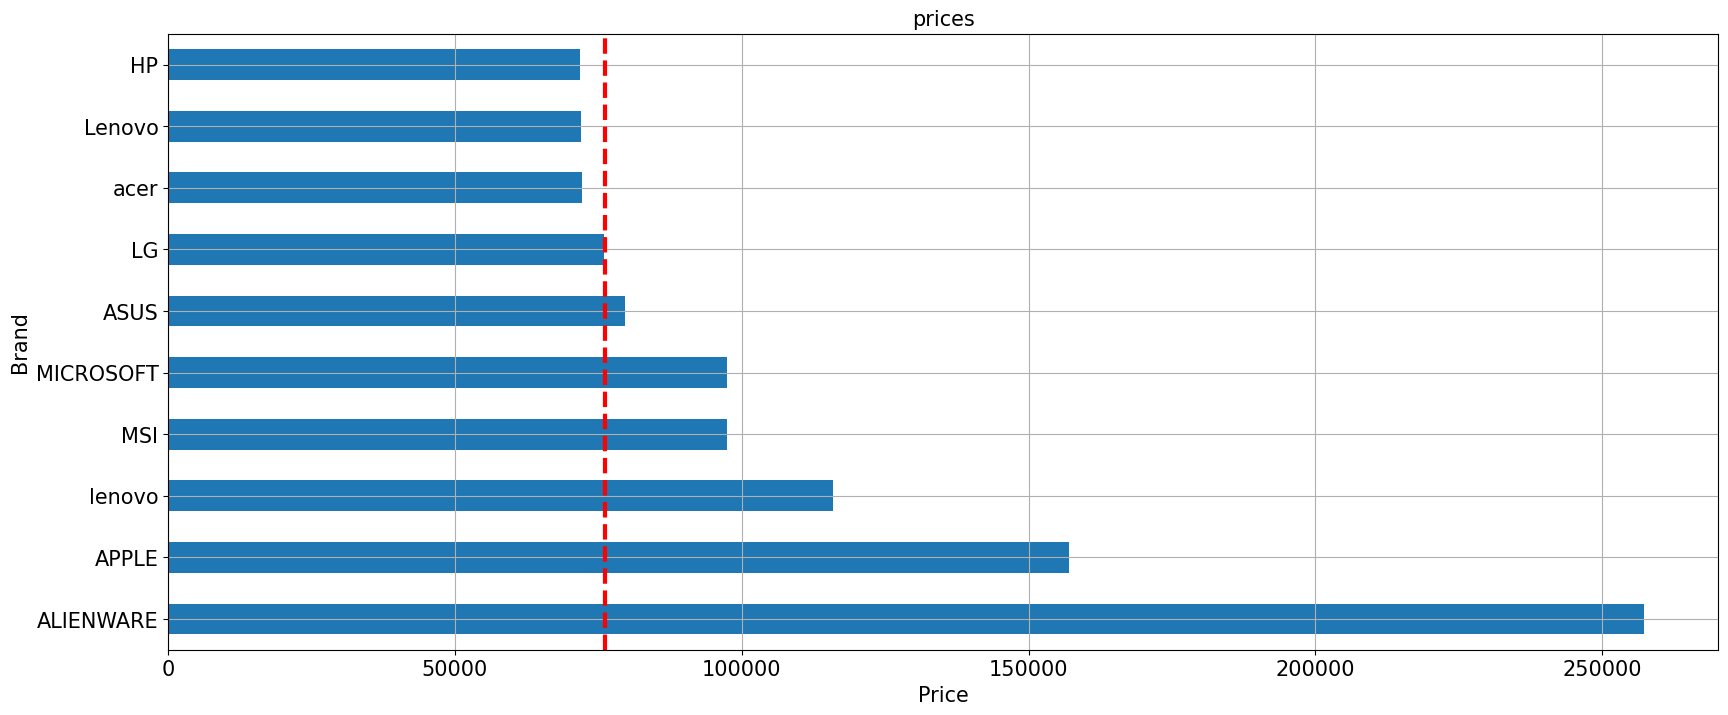

In [14]:
train[['brand','latest_price']].groupby('brand').mean().sort_values(by='latest_price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['latest_price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [15]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

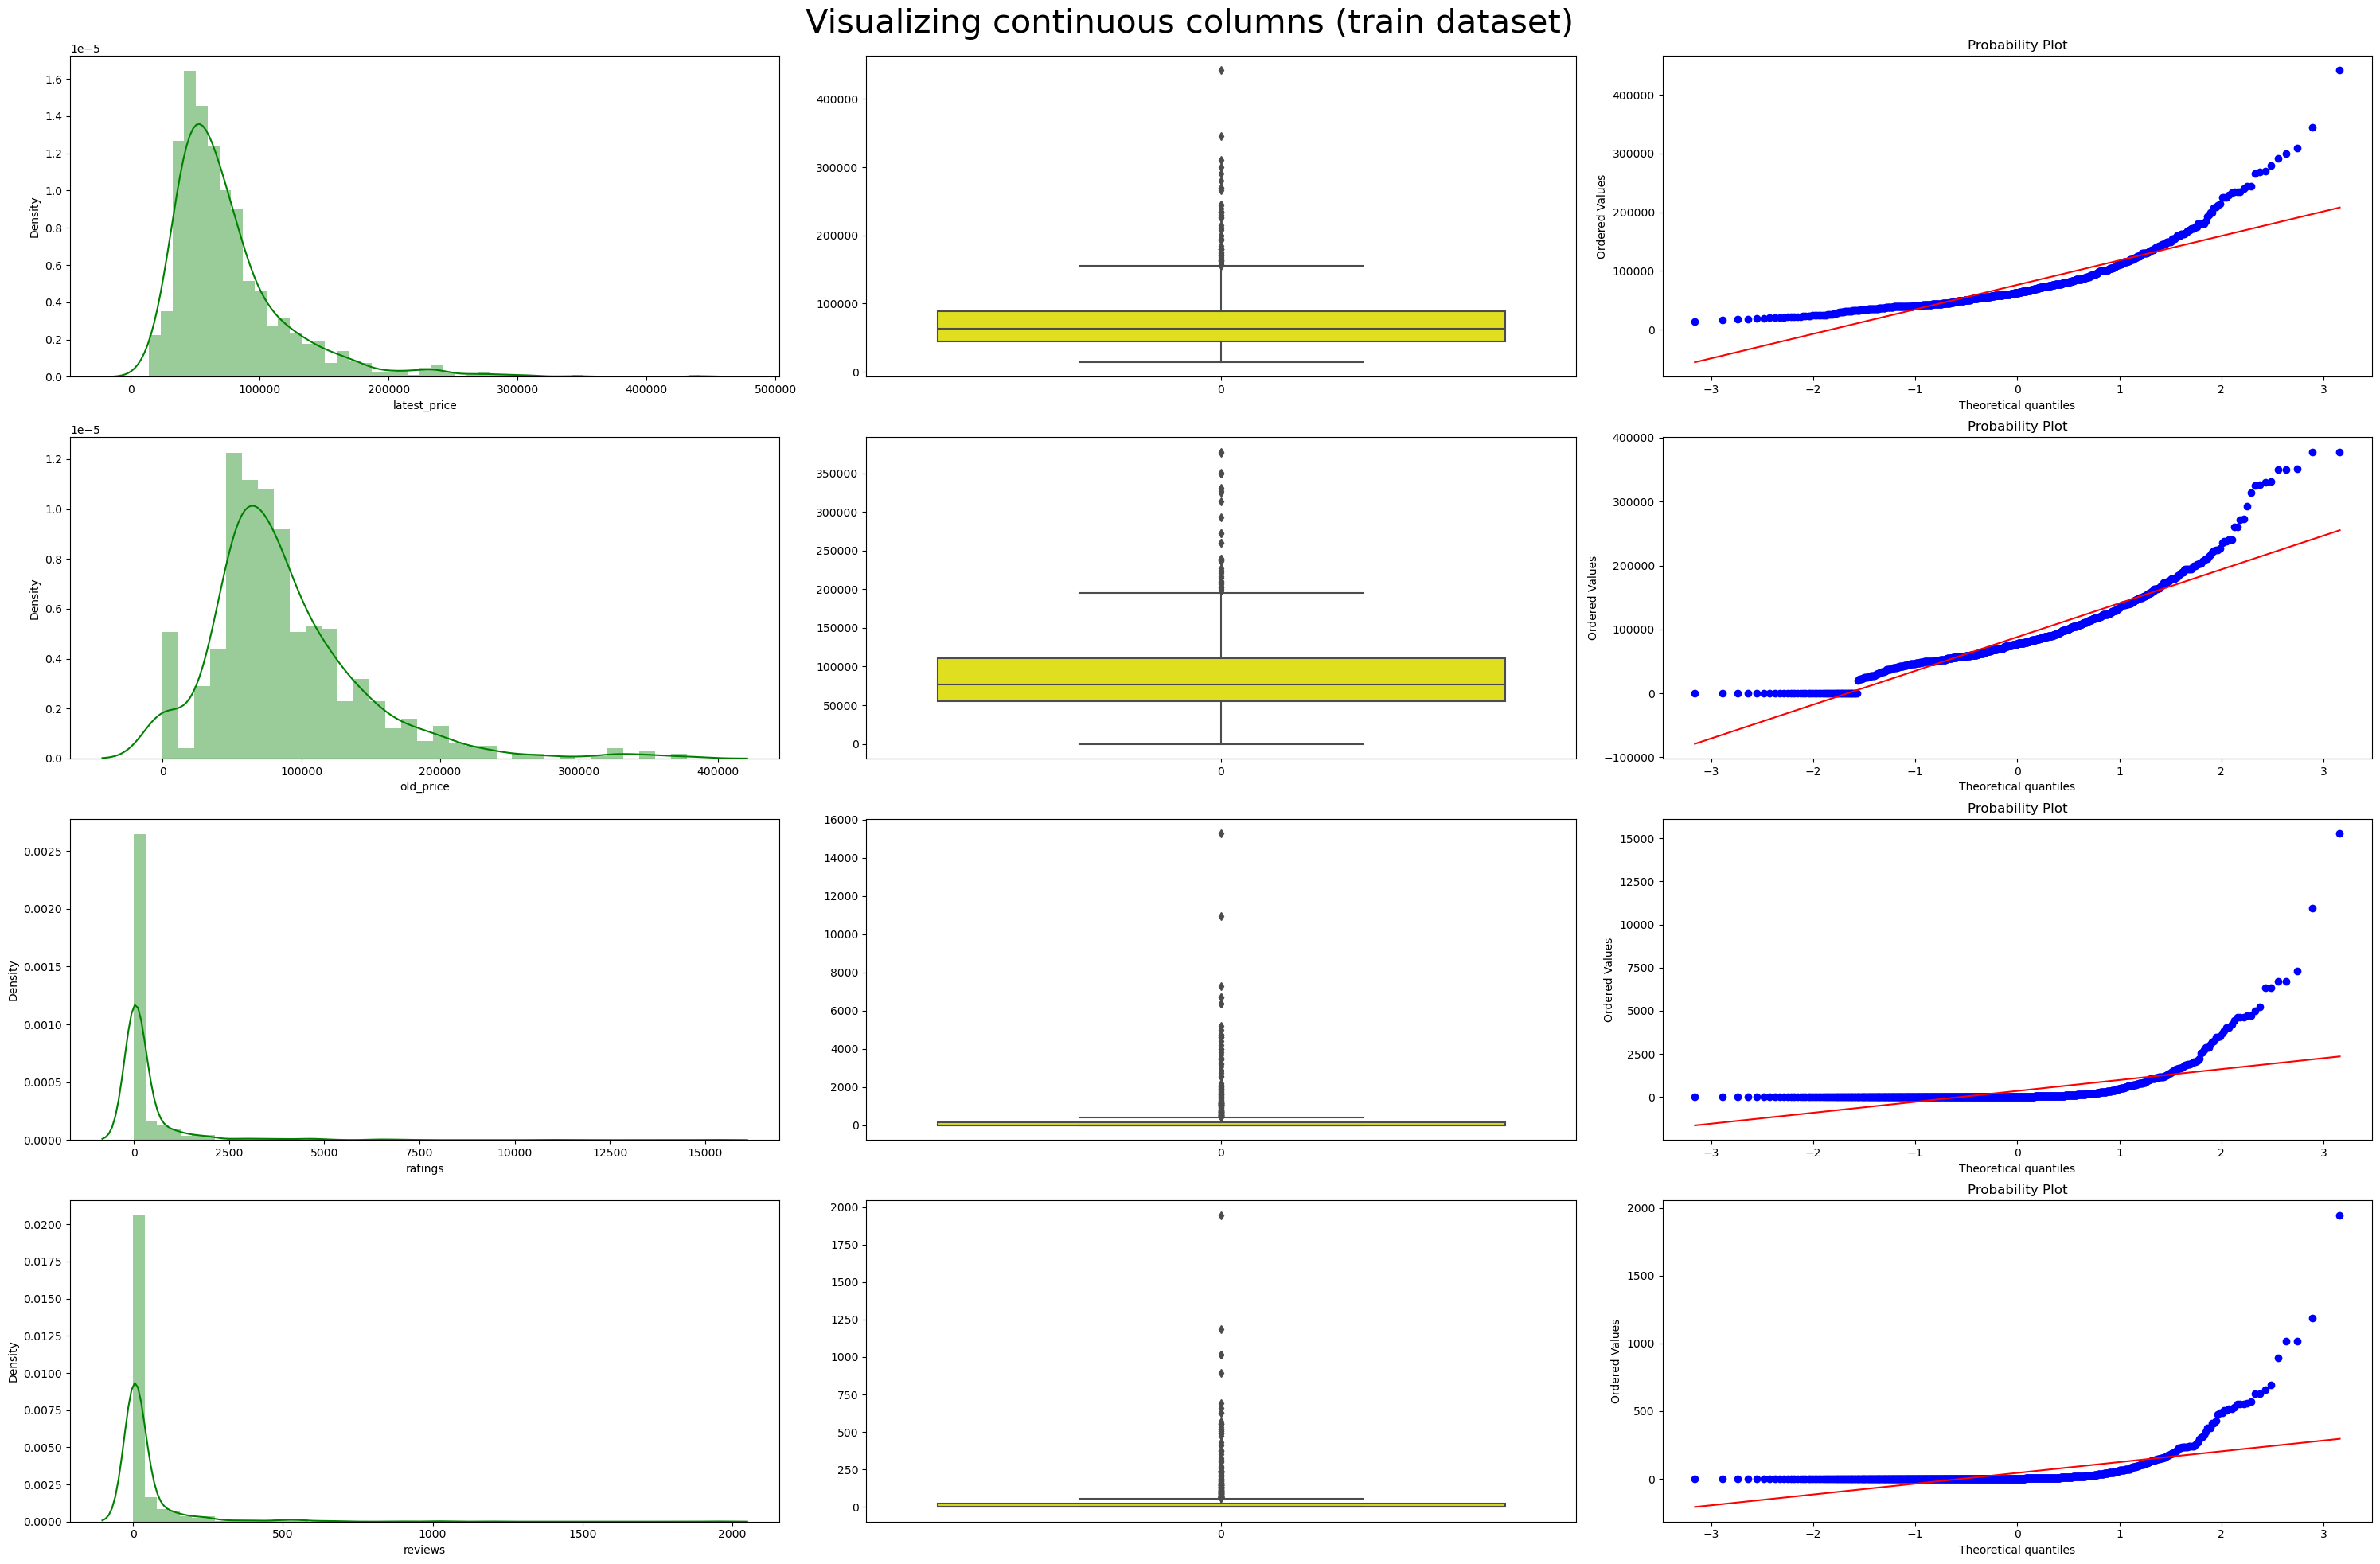

In [16]:
#Let us analyze continuous variables
numeric=['latest_price', 'old_price','ratings', 'reviews']
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

Laptop Price Variables:
These variables are quantitative and have a relatively normal distribution with slight skews.
To predict these variables, you can either use them directly or take the logarithm of the variable to achieve a better normal distribution.

Ratings and Reviews Variables:
There are very strong outliers present in these variables.
When forecasting target variables using ratings and reviews, it's crucial to address these outliers.
Deleting all outliers might lead to the loss of important information, especially considering that the premium segment of laptops might be erroneously classified as outliers.
Since ratings and reviews variables will likely correlate with the target variables, it might not be advisable to delete outliers outright.

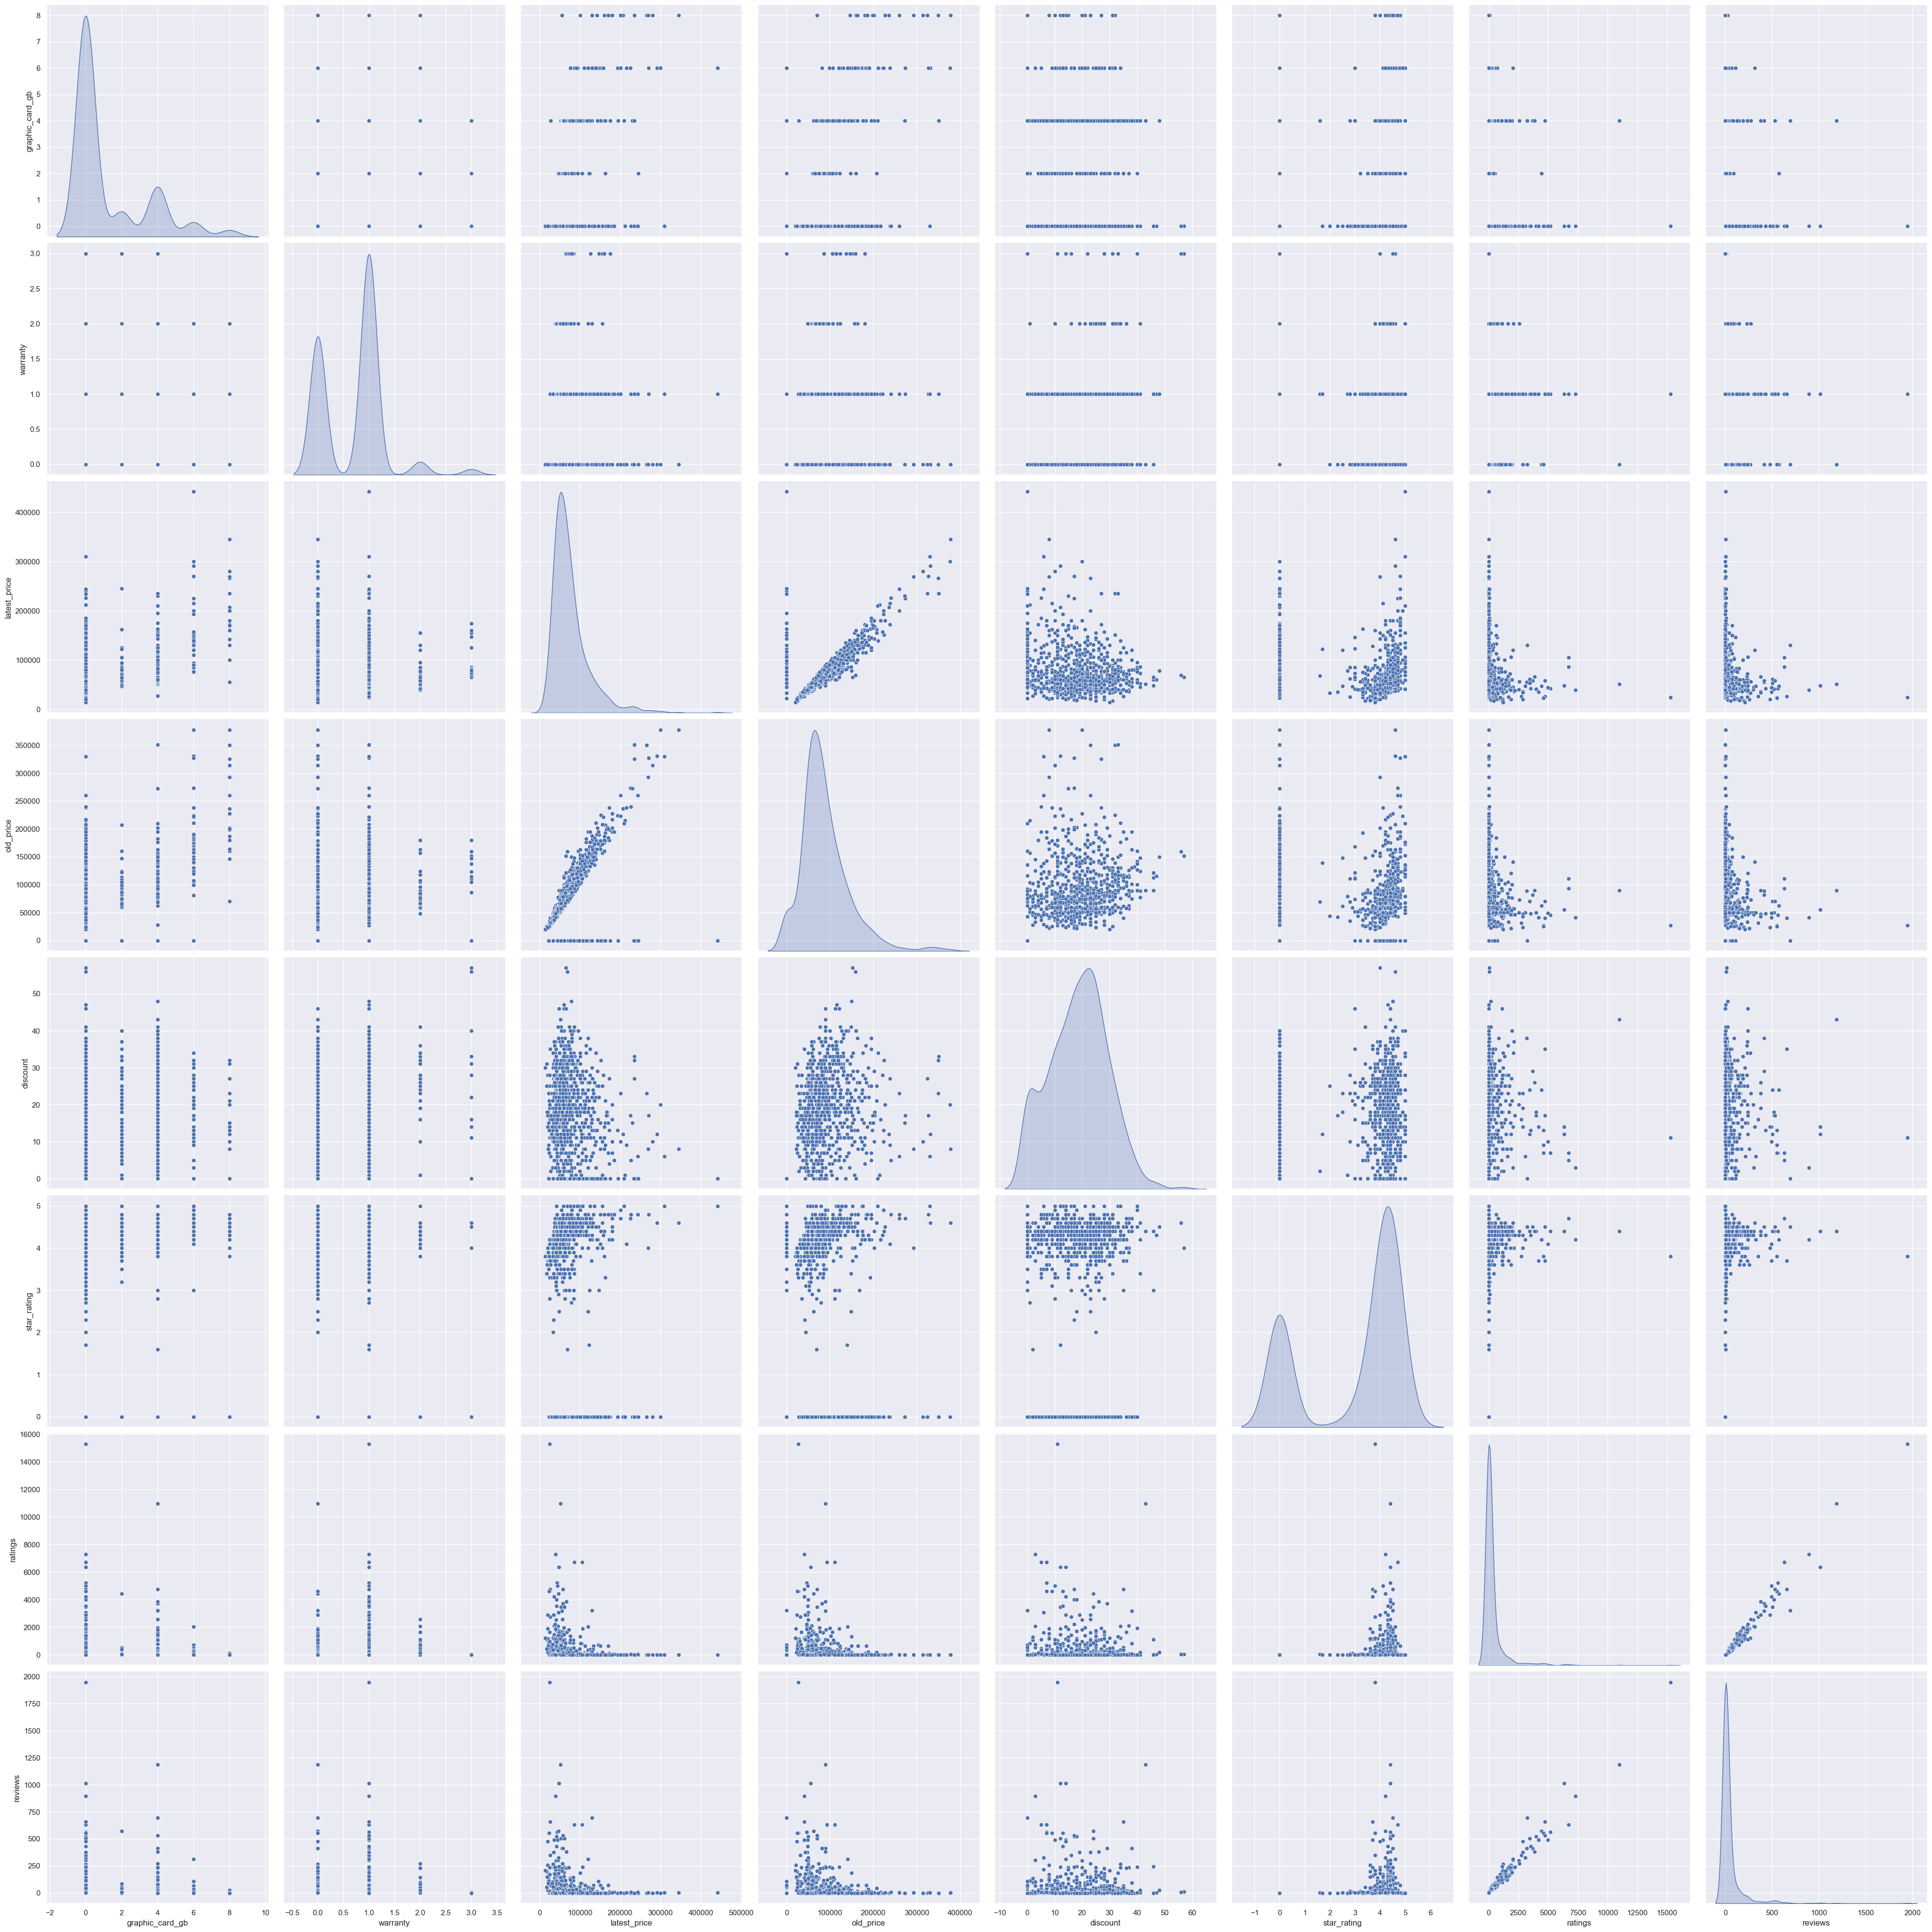

In [17]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

Linear Correlation between Ratings and Reviews:
The scatter plots between the 'ratings' and 'reviews' variables show a clear linear relationship. This suggests that as the number of reviews increases, the rating tends to increase or decrease accordingly. This correlation is intuitive, as popular products often attract more reviews, which can influence their ratings.

Correlation between Latest Price and Old Price:
The scatter plots between 'latest_price' and 'old_price' also indicate a correlation between the two variables. This correlation suggests that there is a relationship between the latest price of a laptop and its previous (old) price. This relationship could be due to factors such as market trends, inflation, or changes in product features over time.

In [18]:
#Let's analyze categorical variables.
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']
categorical_features

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'display_size',
 'warranty',
 'Touchscreen',
 'msoffice',
 'discount',
 'star_rating']

<Figure size 1500x2500 with 0 Axes>

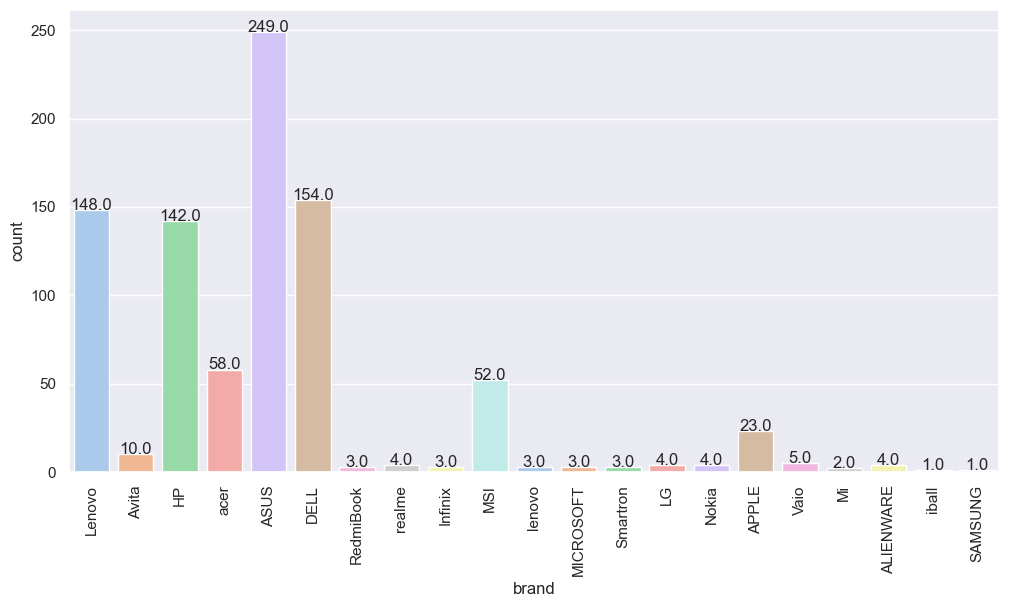

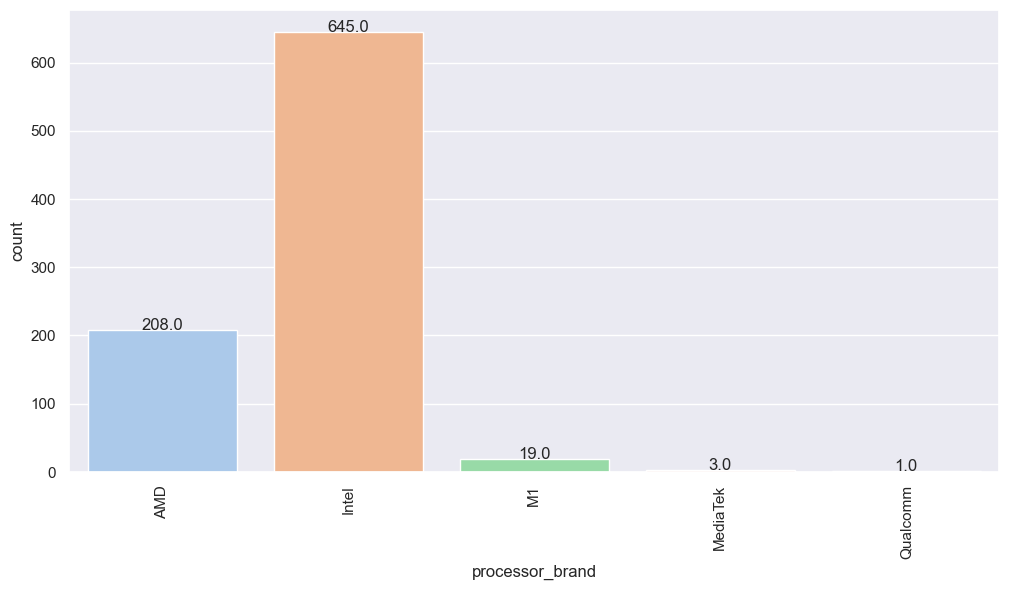

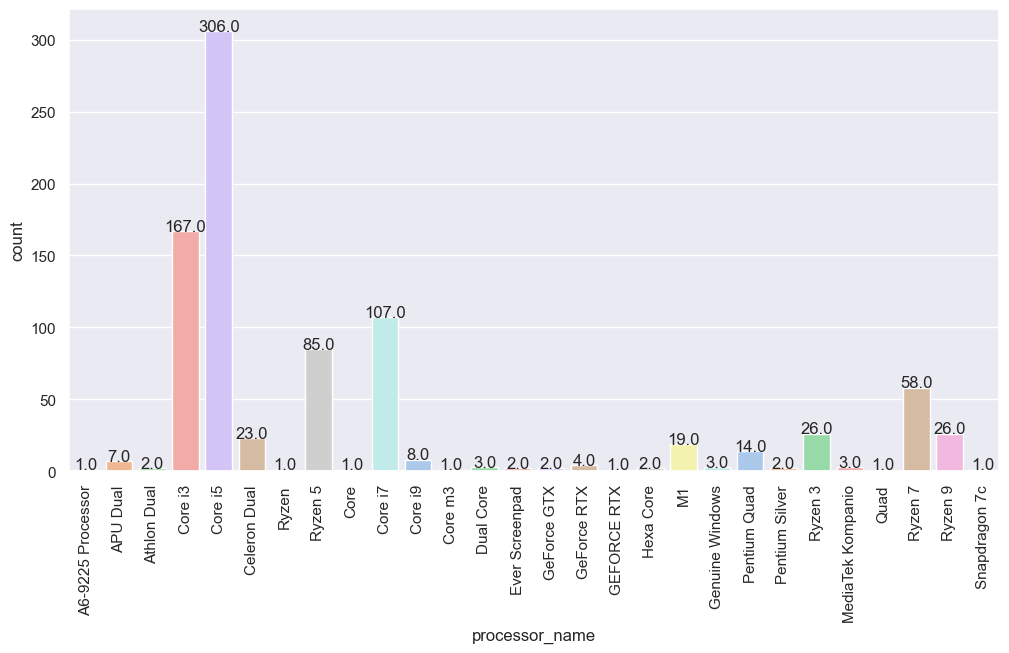

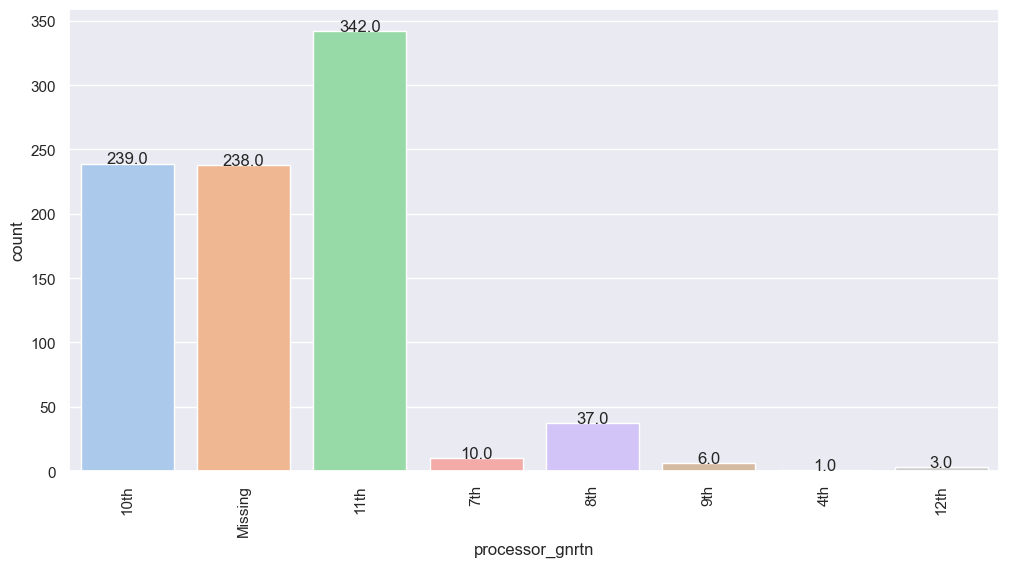

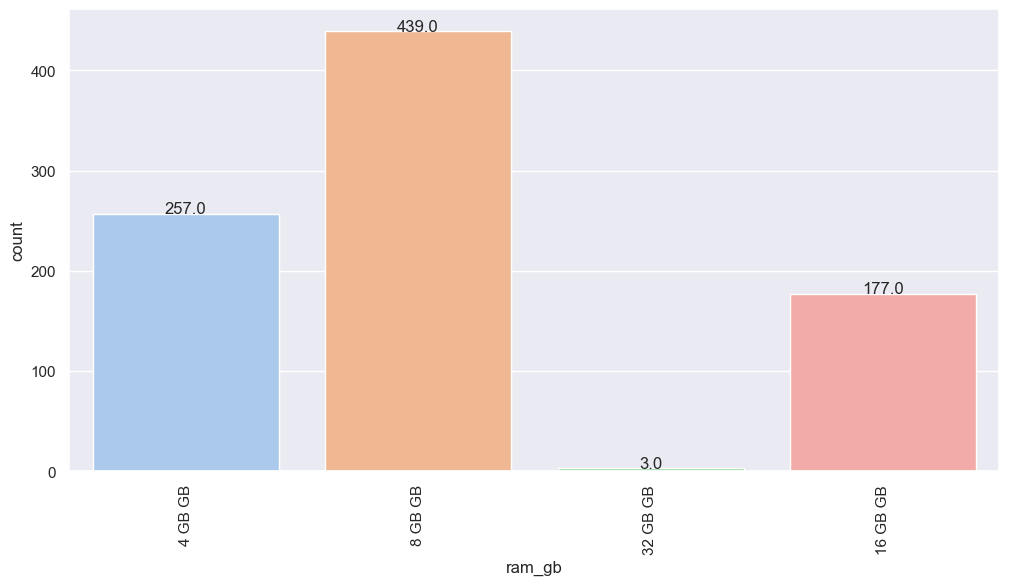

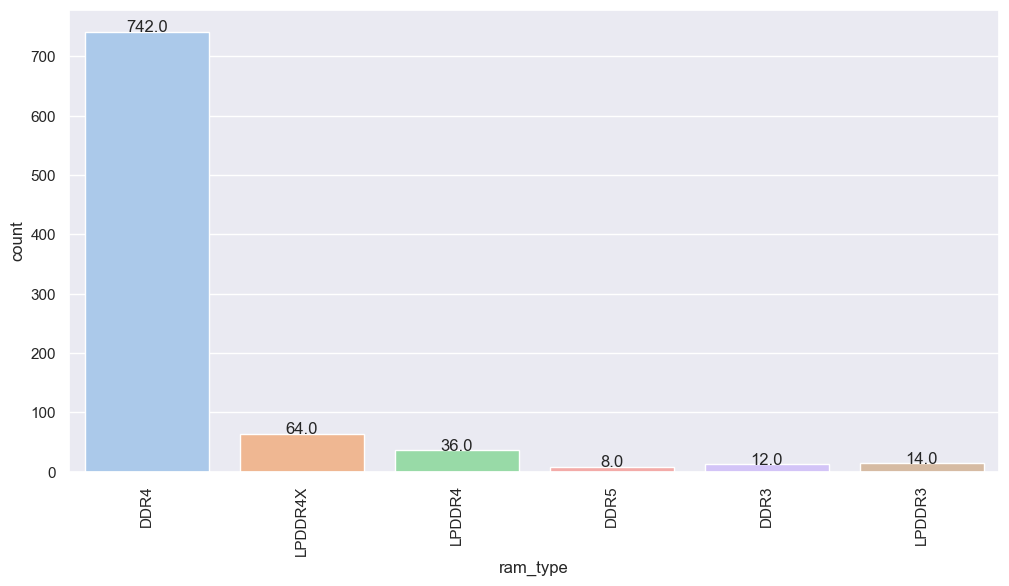

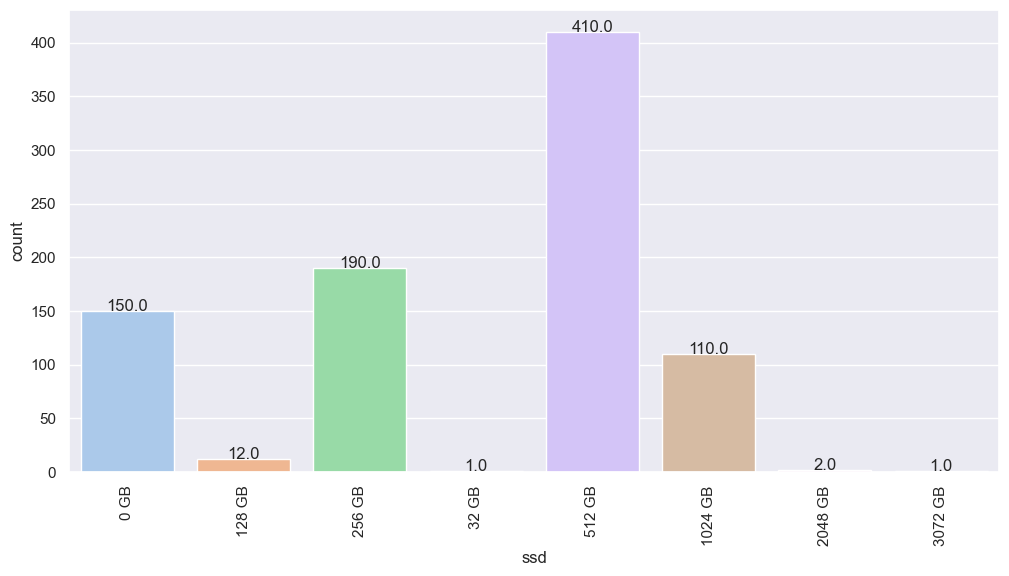

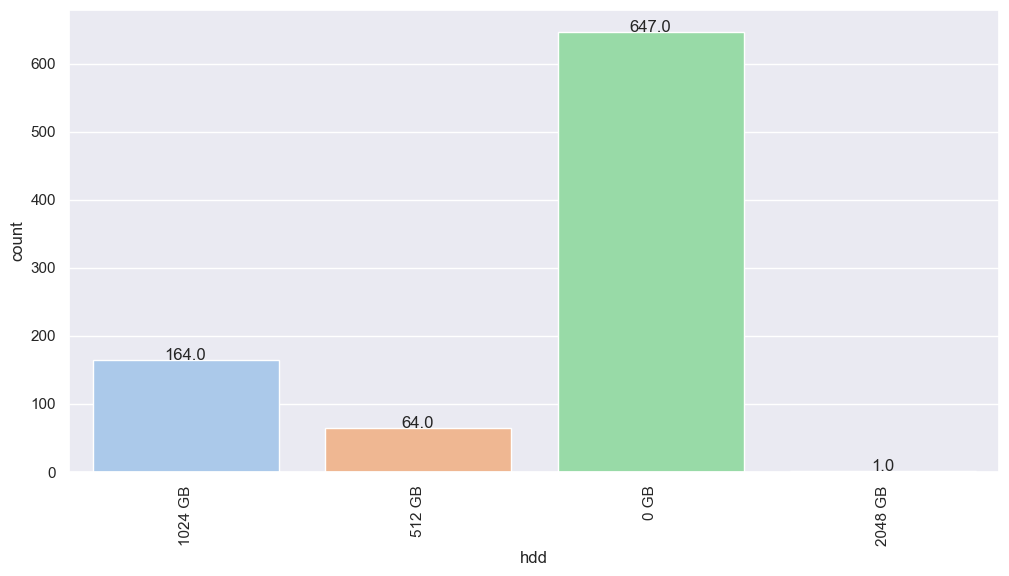

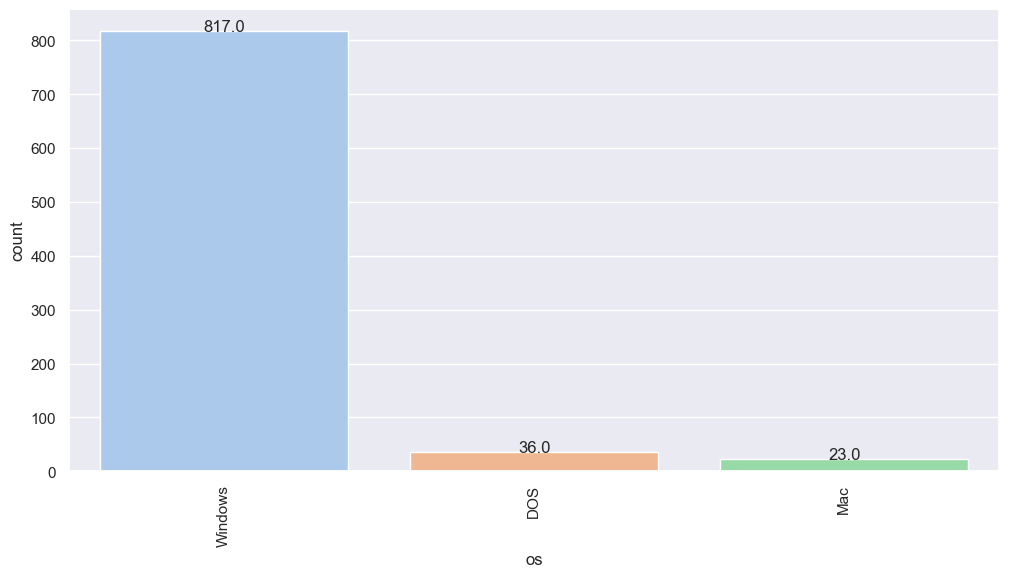

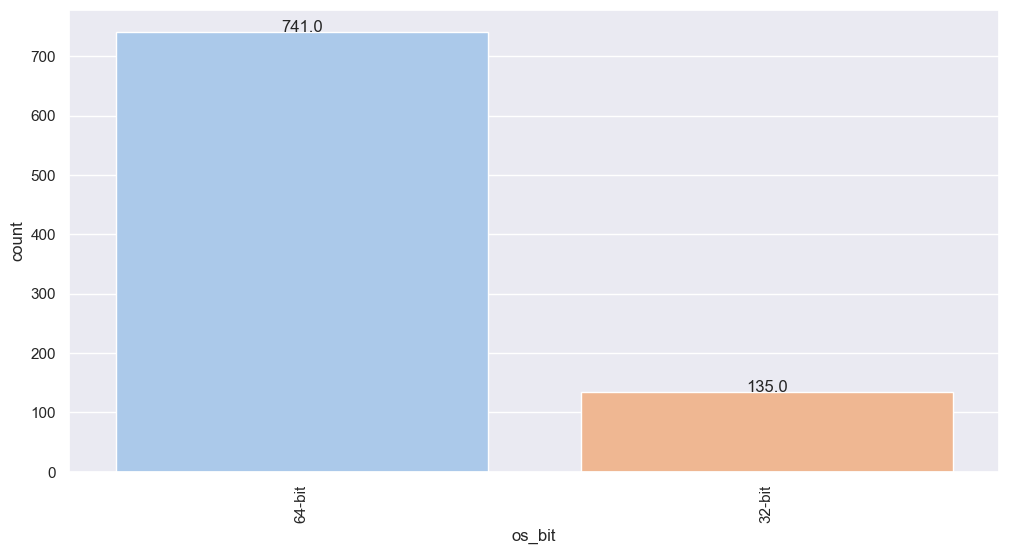

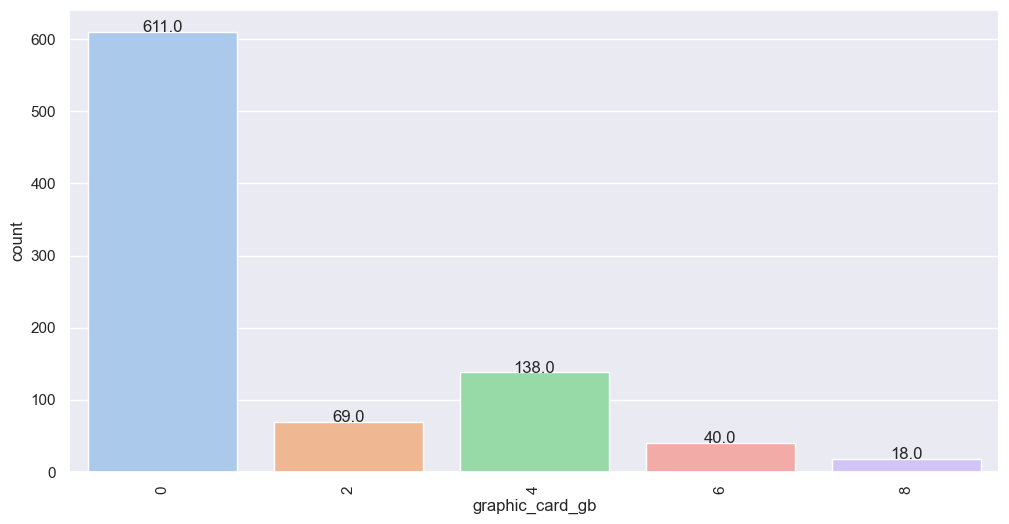

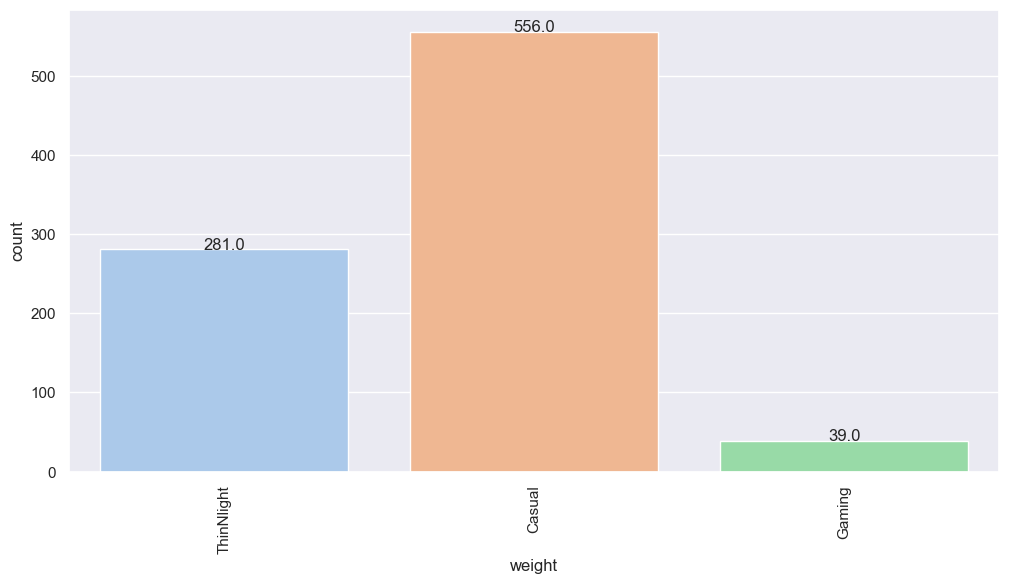

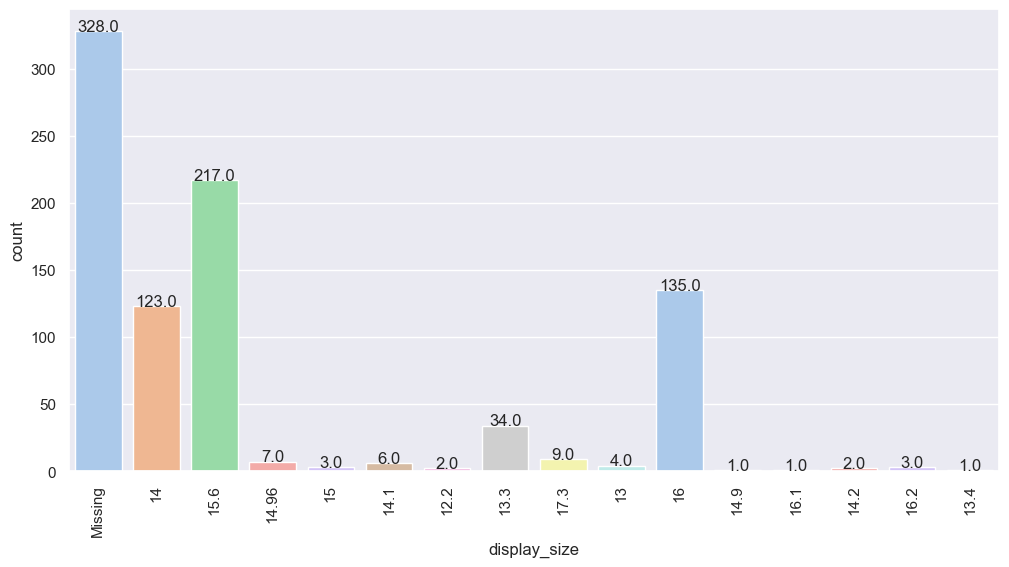

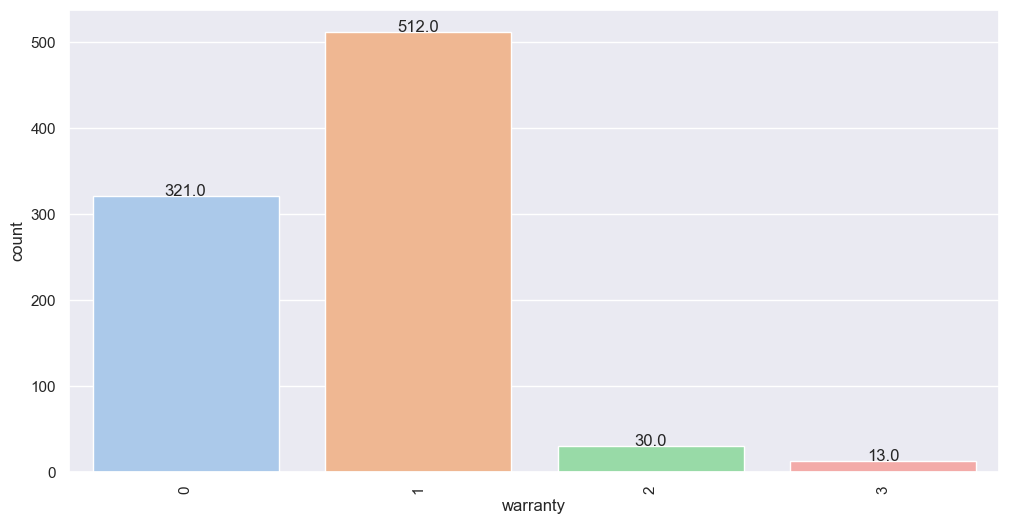

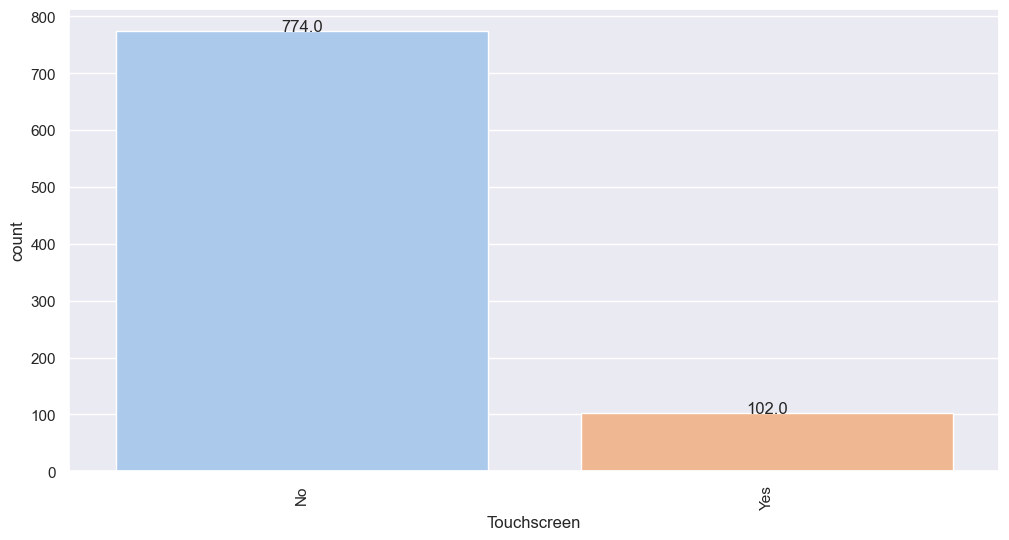

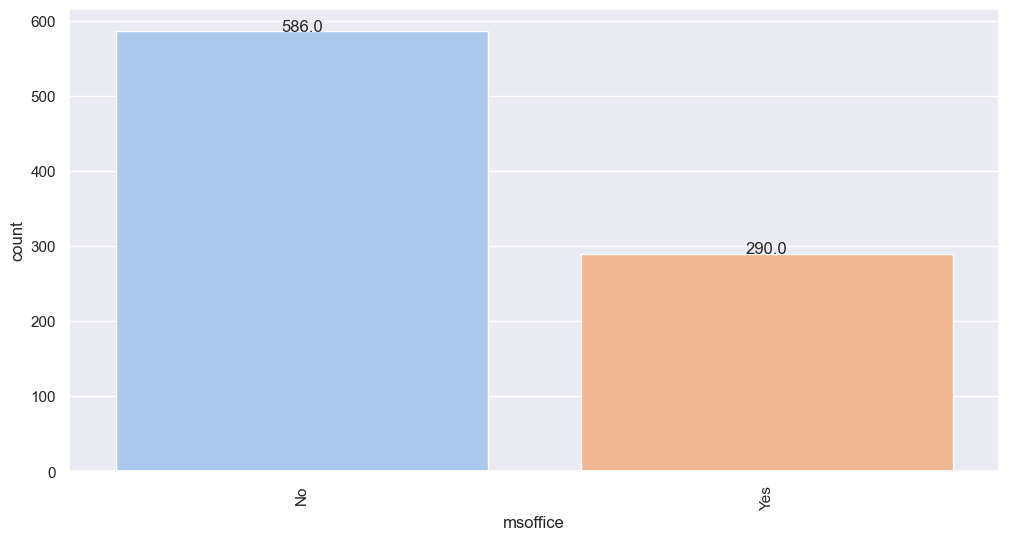

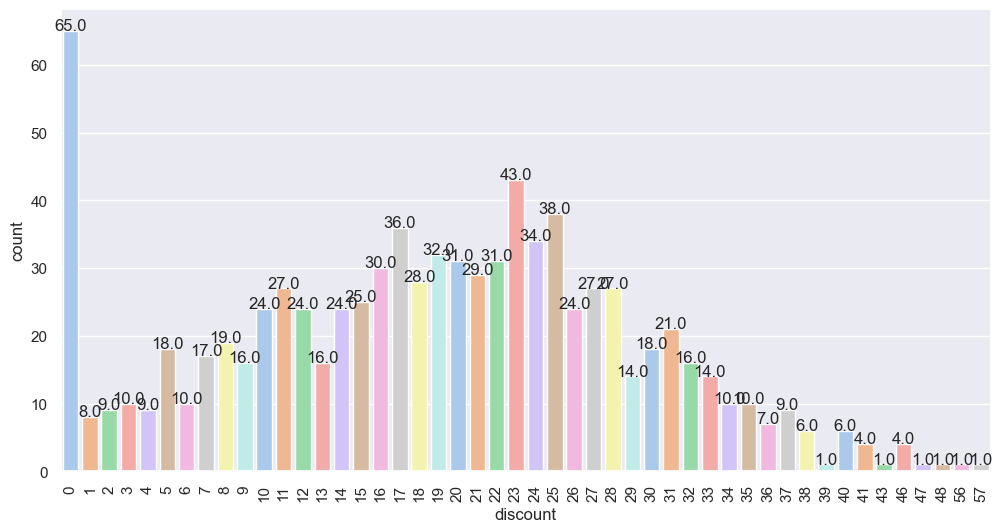

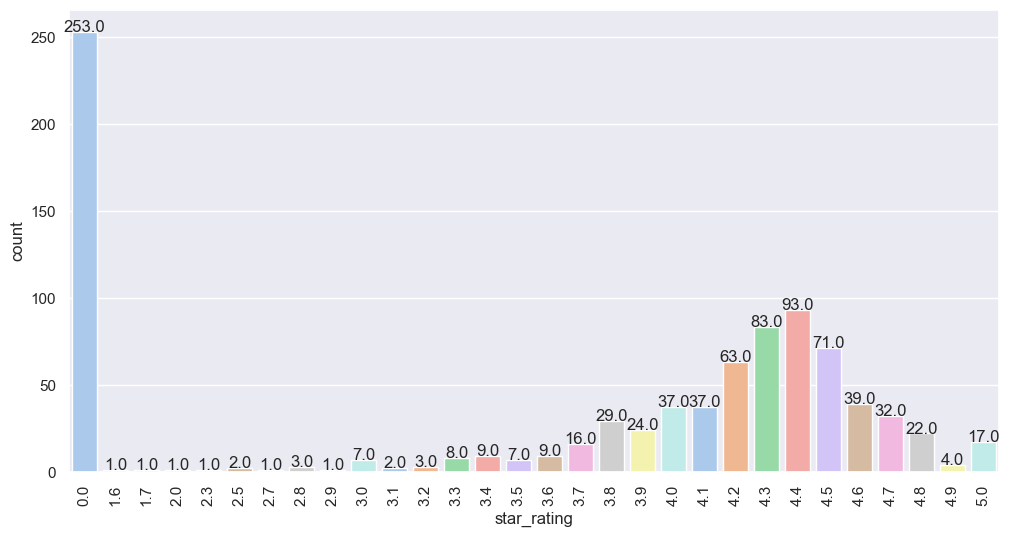

In [19]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

Laptop Brands:
The largest number of laptops are produced under the brands ASUS, DELL, HP, and Lenovo. While the data doesn't include quantitative sales data, it suggests that these brands are prominent players in the laptop market.

Display Size:
The mode of the 'display_size' variable is 15.6 inches, indicating high demand for laptops with this screen size. This size is popular due to its versatility, suitable for both work and home use.

Processors:
The most common processors are Intel processors, especially Core i5, Core i7, and Core i3. This popularity may be attributed to the combination of relatively low price and high performance offered by these processors.

RAM:
The mode of the 'ram_gb' variable is 8 GB, suggesting that this amount of memory is sufficient for most tasks. This reflects the demand for laptops with adequate RAM capacity.

Storage:
Most laptops are sold with an SSD drive, likely due to the increasing demand for faster storage and the cost-effectiveness of SSDs. However, it's noted that some manufacturers may prioritize cost-saving by installing only one storage device, which may not be optimal for performance.

Operating System:
The most common operating system value is Windows 64-bit. This preference can be attributed to the widespread availability and ease of use of the Windows operating system, as well as compatibility with a wide range of software applications.

Gaming Laptops:
Gaming laptops are not as popular, likely because consumers prefer more powerful desktop computers for gaming. Gaming laptops may not offer the same level of performance as desktops, leading to lower demand in the market.

In [20]:
import pandas as pd
numeric_train = train.select_dtypes(include='number')
correlation = numeric_train.corr()
print(correlation['latest_price'].sort_values(ascending = False),'\n')

latest_price       1.000000
old_price          0.744950
graphic_card_gb    0.494891
warranty           0.034402
star_rating       -0.172905
ratings           -0.174766
reviews           -0.175564
discount          -0.207282
Name: latest_price, dtype: float64 



Index(['latest_price', 'old_price', 'graphic_card_gb', 'warranty',
       'star_rating', 'ratings', 'reviews', 'discount'],
      dtype='object')


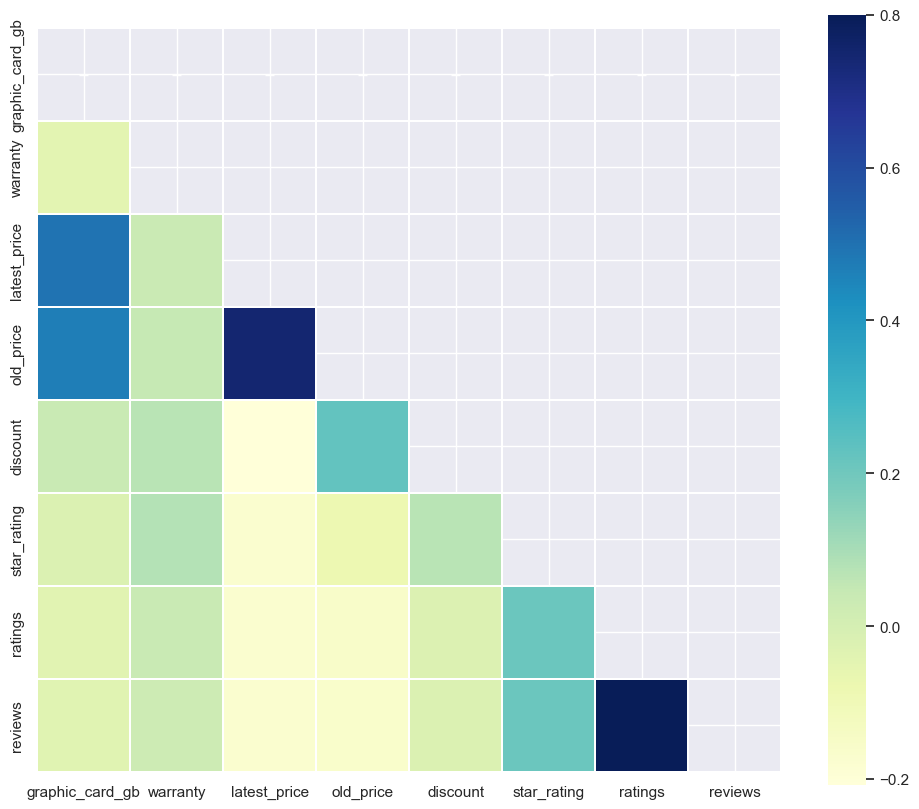

In [21]:
k= 10
cols = correlation.nlargest(k,'latest_price')['latest_price'].index
print(cols)

numeric_train = train.select_dtypes(include='number')
cols = numeric_train.columns
cm = np.corrcoef(numeric_train.values.T)
mask = np.triu(np.ones_like(cm))
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu',
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 12}, yticklabels=cols.values)
plt.show()

Conclusions from the construction of the correlation matrix:

Correlation between old and new prices: It's logical that old and new prices are correlated, as newer models often have higher prices than older ones. Removing the old price when predicting the price of a laptop is a sensible approach to avoid multicollinearity.

Correlation with graphic card memory: The correlation between price and the memory capacity of the graphic card suggests that laptops with higher graphic card memory tend to be more expensive. This feature could be important when predicting laptop prices.

Correlation between ratings and reviews: The strong correlation between ratings and reviews indicates that they provide similar information. Removing one of these variables, such as reviews, can reduce redundancy in the dataset without losing much predictive power.

###                                      FEARUTE ENGENEERING

In [22]:
#Find out how many missing values are in certain columns.
for feature in categorical_features:
  k=train[feature]
  print(f'Feature {feature} has unique values:',train[feature].unique())
  print(30*'---')

Feature brand has unique values: ['Lenovo' 'Avita' 'HP' 'acer' 'ASUS' 'DELL' 'RedmiBook' 'realme' 'Infinix'
 'MSI' 'lenovo' 'MICROSOFT' 'Smartron' 'LG' 'Nokia' 'APPLE' 'Vaio' 'Mi'
 'ALIENWARE' 'iball' 'SAMSUNG']
------------------------------------------------------------------------------------------
Feature processor_brand has unique values: ['AMD' 'Intel' 'M1' 'MediaTek' 'Qualcomm']
------------------------------------------------------------------------------------------
Feature processor_name has unique values: ['A6-9225 Processor' 'APU Dual' 'Athlon Dual' 'Core i3' 'Core i5'
 'Celeron Dual' 'Ryzen' 'Ryzen 5' 'Core' 'Core i7' 'Core i9' 'Core m3'
 'Dual Core' 'Ever Screenpad' 'GeForce GTX' 'GeForce RTX' 'GEFORCE RTX'
 'Hexa Core' 'M1' 'Genuine Windows' 'Pentium Quad' 'Pentium Silver'
 'Ryzen 3' 'MediaTek Kompanio' 'Quad' 'Ryzen 7' 'Ryzen 9' 'Snapdragon 7c']
------------------------------------------------------------------------------------------
Feature processor_gnrtn has unique 

The above code will print out the unique values for each categorical feature in your dataset and give you insight into the presence of missing values. If a certain unique value appears to be missing, it will be represented as NaN (Not a Number) in the output.

In [23]:
train['processor_gnrtn'].value_counts().to_frame()

count
processor_gnrtn       
11th               342
10th               239
Missing            238
8th                 37
7th                 10
9th                  6
12th                 3
4th                  1

In [24]:
train['display_size'].value_counts().to_frame()

count
display_size       
Missing         328
15.6            217
16              135
14              123
13.3             34
17.3              9
14.96             7
14.1              6
13                4
15                3
16.2              3
12.2              2
14.2              2
14.9              1
16.1              1
13.4              1

The maximum number of missing values in the dataset is 566, which is more than 50% of the dataset size. Let's replace the values with np.nan.

In [25]:
train.replace('Missing', np.NaN,inplace=True)
train.isnull().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size       328
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

In [26]:
# Let's form an array of features that will be replaced by the OneHot method.
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [27]:
OH=['brand','processor_brand','processor_name','ram_type','os','os_bit','weight','Touchscreen','msoffice']

In [28]:
train.shape

(876, 23)

In [29]:
ind=range(876)
train['Index']=ind
train=train.set_index('Index')

In [30]:
for feature in OH:
  TBL=pd.get_dummies(train[feature]).add_prefix(feature)
  train=train.merge(TBL,on='Index')
  train.drop([feature],axis=1,inplace=True)

In [31]:
TX=['processor_gnrtn','ram_gb','ssd','hdd','display_size']

In [32]:
# Let's remove the letters from the signs, leaving only the numbers.
train.fillna('9999TH',inplace=True)
import re
for feature in TX:
  K=list(train[feature])
  K1=[float(re.sub("\D","",i)) for i in K]

In [44]:
train.replace(9999, np.NaN,inplace=True)

In [34]:
train.drop('model',axis=1,inplace=True)

In [35]:
# Let's restore the information using KNNImputer.
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

non_numeric_cols = train.select_dtypes(exclude=['number']).columns
encoder = OrdinalEncoder()
train_encoded = pd.DataFrame(encoder.fit_transform(train[non_numeric_cols]), columns=non_numeric_cols)
train_numeric = train.drop(columns=non_numeric_cols)
train_combined = pd.concat([train_numeric, train_encoded], axis=1)

# Now, use KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")
train_imputed = imputer.fit_transform(train_combined)
train_imputed = pd.DataFrame(train_imputed, columns=train_combined.columns)

In [36]:
# Let's clean up our dataset from outliers using the LOF method. We delete no more than 10% of the dataset.
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(train_imputed) 
train_imputed['Out']=y_pred
Out=train_imputed[train_imputed['Out']!=1]
Out.shape

(80, 86)

In [37]:
train2=train_imputed[train_imputed['Out']==1]
train2=train2.drop('Out',axis=1)
train2.head()

graphic_card_gb  warranty  latest_price  old_price  discount  star_rating  \
0              0.0       0.0       24990.0    32790.0      23.0          3.7   
1              0.0       0.0       19590.0    21325.0       8.0          3.6   
2              0.0       0.0       19990.0    27990.0      28.0          3.7   
3              0.0       0.0       21490.0    27990.0      23.0          3.7   
4              0.0       0.0       24990.0    33490.0      25.0          3.7   

   ratings  reviews  processor_gnrtn  ram_gb  ...  osWindows  os_bit32-bit  \
0     63.0     12.0              0.0     2.0  ...        1.0           0.0   
1   1894.0    256.0              0.0     2.0  ...        1.0           0.0   
2   1153.0    159.0              0.0     2.0  ...        1.0           0.0   
3   1153.0    159.0              0.0     2.0  ...        1.0           0.0   
4   1657.0    234.0              0.0     2.0  ...        1.0           0.0   

   os_bit64-bit  weightCasual  weightGaming  weightThinNlight  TouchscreenNo  \
0           1.0           0.0           0.0               1.0            1.0   
1           1.0           1.0           0.0               0.0            1.0   
2           1.0           0.0           0.0               1.0            1.0   
3           1.0           0.0           0.0               1.0            1.0   
4           1.0           0.0           0.0               1.0            1.0   

   TouchscreenYes  msofficeNo  msofficeYes  
0             0.0         1.0          0.0  
1             0.0         1.0          0.0  
2             0.0         1.0          0.0  
3             0.0         1.0          0.0  
4             0.0         1.0          0.0  

[5 rows x 85 columns]

In [38]:
# Emissions cleared! Remove duplicate features.
train2.drop(['old_price','reviews'],axis=1,inplace=True)

### MACHINE LEARNING AND CLUSTER ANALYSIS

In [39]:
y=train2['latest_price']
X=train2.drop(['latest_price'],axis=1)

In [40]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor(),Ridge()]
scores = dict()

for m in models:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 249284554.60200682
MAE: 9269.0545625
------------------------------ 

model: LinearRegression()
RMSE: 226465520.99789435
MAE: 10619.946151834787
------------------------------ 

model: ElasticNet()
RMSE: 615207899.9569795
MAE: 17666.084748999314
------------------------------ 

model: KNeighborsRegressor()
RMSE: 909450959.3252499
MAE: 20706.95625
------------------------------ 

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=

In [42]:
# Let's scale our data.
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = train2.columns
d = scaler.fit_transform(train2)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

graphic_card_gb  warranty  latest_price  discount  star_rating   ratings  \
0              0.0       0.0      0.041515  0.500000         0.74  0.004123   
1              0.0       0.0      0.013492  0.173913         0.72  0.123961   
2              0.0       0.0      0.015568  0.608696         0.74  0.075463   
3              0.0       0.0      0.023352  0.500000         0.74  0.075463   
4              0.0       0.0      0.041515  0.543478         0.74  0.108450   

   processor_gnrtn    ram_gb       ssd       hdd  ...  osWindows  \
0              0.0  0.666667  0.000000  0.333333  ...        1.0   
1              0.0  0.666667  0.000000  1.000000  ...        1.0   
2              0.0  0.666667  0.285714  0.000000  ...        1.0   
3              0.0  0.666667  0.285714  0.000000  ...        1.0   
4              0.0  0.666667  0.571429  0.000000  ...        1.0   

   os_bit32-bit  os_bit64-bit  weightCasual  weightGaming  weightThinNlight  \
0           0.0           1.0           0.0           0.0               1.0   
1           0.0           1.0           1.0           0.0               0.0   
2           0.0           1.0           0.0           0.0               1.0   
3           0.0           1.0           0.0           0.0               1.0   
4           0.0           1.0           0.0           0.0               1.0   

   TouchscreenNo  TouchscreenYes  msofficeNo  msofficeYes  
0            1.0             0.0         1.0          0.0  
1            1.0             0.0         1.0          0.0  
2            1.0             0.0         1.0          0.0  
3            1.0             0.0         1.0          0.0  
4            1.0             0.0         1.0          0.0  

[5 rows x 83 columns]

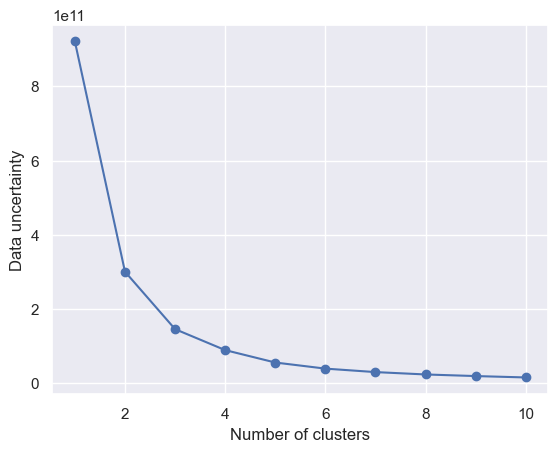

In [43]:
# Carry out clustering and determine the optimal number of clusters.
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train2)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

### CONCLUSIONS AND RECOMENDATIONS

Purpose of the Laptop: Determine the primary use case for the laptop, whether it's for document work, multimedia, gaming, etc. This will influence the choice of hardware components.

Processor (CPU) and Graphics (GPU):
For general usage like document work and web browsing, a CPU with average performance and an integrated graphics card is sufficient.
Intel Core i5 and i7 CPUs provide better performance, while Ryzen 5 processors from AMD offer good integrated graphics performance.
High-end CPUs like i7 or Ryzen 7 are suitable for powerful workstations and gaming laptops.

Screen Resolution:
4K resolution screens may not be necessary for laptops, as the human eye may not perceive the difference on smaller screens.
A resolution of 1920x1080 (Full HD) is sufficient for most users.
Higher resolutions consume more resources from the CPU and GPU and may cause discomfort due to smaller UI elements.

Storage:
Laptops with only one storage device may not be ideal as they may lack redundancy.
SSDs provide faster performance, but HDDs offer more storage capacity.
A combination of SSD for speed and HDD for storage is preferable.

RAM:
For basic tasks, 4GB of RAM is sufficient.
For graphics and gaming, 8GB of RAM is recommended.
Complex tasks may require 16GB or 32GB of RAM.
Dual-channel memory installation can improve data processing speed.

### THANK YOU